In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('Data/data.csv').set_index('Date')

In [11]:
df

,Asset,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7,Signal8
Date,,,,,,,,,
2000-01-03,4258.481700,4237.827494,393.780879,-337.933192,659.763906,-752.865453,1034.127659,-950.257818,198.264577
2000-01-04,4260.246443,4222.822224,378.585650,-364.449284,648.940384,-732.505856,1042.256957,-977.358249,211.206055
2000-01-05,4262.254628,4213.824762,389.955615,-391.594831,641.329710,-728.611976,1063.217724,-951.518386,198.595598
2000-01-06,4289.405332,4239.016108,406.660516,-333.249594,683.822313,-729.657222,1079.316062,-932.785850,181.822031
2000-01-07,4293.746629,4232.818801,403.366787,-320.479903,682.553985,-713.180569,1087.226725,-941.674136,197.875560
...,...,...,...,...,...,...,...,...,...
2019-02-25,3607.657394,5672.724183,-270.381567,885.322225,-117.179461,422.539688,-213.177898,-492.201715,-955.970110
2019-02-26,3645.227459,5660.925776,-267.452339,915.180936,-74.990947,446.189891,-220.577754,-495.388561,-961.812251
2019-02-27,3657.547976,5660.276393,-259.729634,917.858004,-70.137790,454.295078,-246.966053,-496.229630,-950.623296


<Axes: xlabel='Date'>

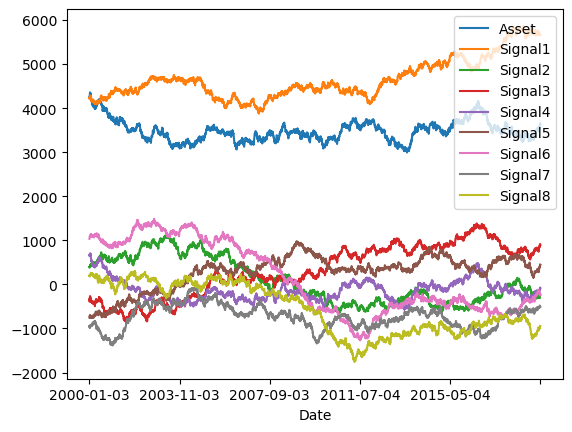

In [6]:
df.plot()

# Baseline Martingale Model

In [106]:
df["Martingale"]=df.Asset.shift(1)
ae_martingale = np.abs(df.Martingale-df.Asset)
se_martingale =  np.power(df.Martingale-df.Asset,2)
print("Martingale Model\n"
    f"Mean Absolute Error: {ae_martingale.mean():.3f} +/- {ae_martingale.std():.3f}\n"
    f"Root Mean Squared Error: {np.sqrt(se_martingale.mean()):.3f} +/- {np.sqrt(se_martingale.std()):.3f}")

Martingale Model
Mean Absolute Error: 15.074 +/- 11.384
Root Mean Squared Error: 18.889 +/- 22.690


# First Difference Time Series

<Axes: xlabel='Date'>

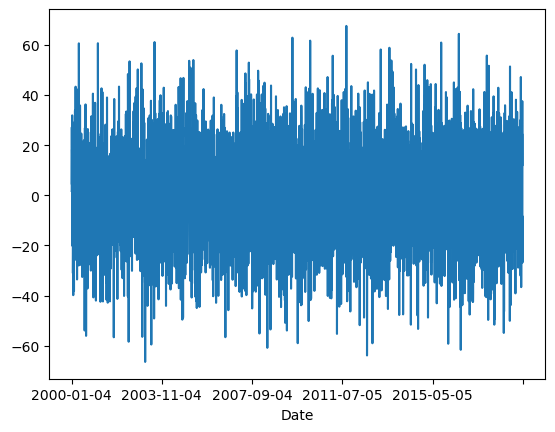

In [46]:
fd_ts = (df - df.shift(1)).drop(columns="Martingale").drop("2000-01-03")
fd_ts.Asset.plot()

In [124]:
corr = fd_ts.corr()
corr.style.background_gradient(cmap='coolwarm')

,Asset,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7,Signal8
Asset,1.000000,-0.011851,0.006108,0.422441,0.845605,-0.028559,-0.006656,-0.010325,-0.020283
Signal1,-0.011851,1.000000,0.394311,-0.011883,-0.008808,-0.006020,-0.009544,-0.004805,-0.025590
Signal2,0.006108,0.394311,1.000000,-0.001041,0.002292,-0.036595,-0.025214,-0.012645,-0.040527
Signal3,0.422441,-0.011883,-0.001041,1.000000,0.504752,0.007333,0.004500,-0.004893,0.012288
Signal4,0.845605,-0.008808,0.002292,0.504752,1.000000,-0.020552,0.003335,-0.006337,-0.015928
Signal5,-0.028559,-0.006020,-0.036595,0.007333,-0.020552,1.000000,-0.199353,0.017104,0.516876
Signal6,-0.006656,-0.009544,-0.025214,0.004500,0.003335,-0.199353,1.000000,0.395893,-0.016694
Signal7,-0.010325,-0.004805,-0.012645,-0.004893,-0.006337,0.017104,0.395893,1.000000,0.011681
Signal8,-0.020283,-0.025590,-0.040527,0.012288,-0.015928,0.516876,-0.016694,0.011681,1.000000


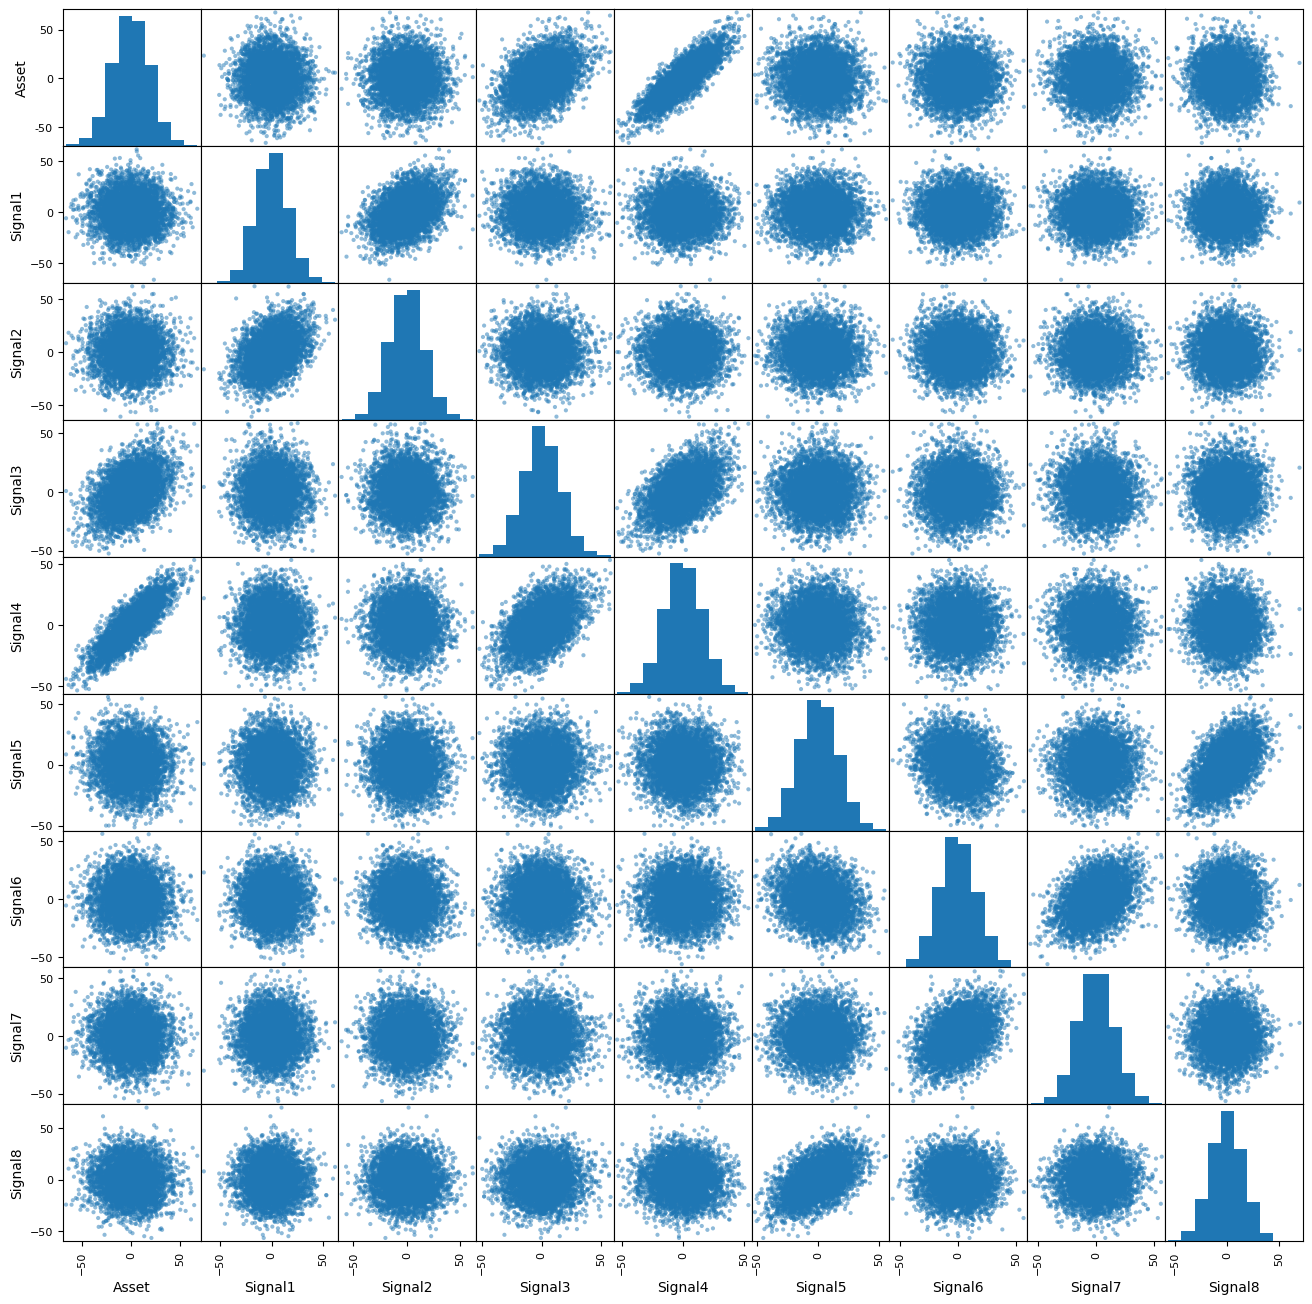

In [128]:
pd.plotting.scatter_matrix(fd_ts,figsize=(16,16))
plt.show()

# Splitting the Data

In [140]:
from sklearn.model_selection import TimeSeriesSplit

fd_ts_cv = TimeSeriesSplit(
    n_splits=fd_ts.shape[0]-1,
    test_size=1
)

In [141]:
X=fd_ts.drop(columns="Asset")
y=fd_ts["Asset"]
all_splits = list(fd_ts_cv.split(X, y))
train_0, test_0 = all_splits[-1]

In [142]:
X.iloc[train_0]

,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7,Signal8
Date,,,,,,,,
2000-01-04,-15.005270,-15.195229,-26.516092,-10.823522,20.359597,8.129298,-27.100431,12.941478
2000-01-05,-8.997462,11.369965,-27.145547,-7.610674,3.893880,20.960767,25.839863,-12.610457
2000-01-06,25.191346,16.704902,58.345237,42.492603,-1.045246,16.098338,18.732536,-16.773566
2000-01-07,-6.197307,-3.293729,12.769691,-1.268328,16.476653,7.910663,-8.888286,16.053529
2000-01-10,-3.973652,10.383052,32.382587,-1.316595,-9.372607,10.185395,-1.717331,14.277228
...,...,...,...,...,...,...,...,...
2019-02-22,-0.093043,-1.330660,-15.459361,7.619613,21.654070,4.016387,7.759658,19.899040
2019-02-25,-2.116325,7.290219,4.436618,-5.515415,8.199236,-17.809564,-10.148464,-1.156447
2019-02-26,-11.798407,2.929227,29.858711,42.188514,23.650203,-7.399856,-3.186846,-5.842141


In [143]:
X.iloc[test_0]

,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7,Signal8
Date,,,,,,,,
2019-03-01,0.0,0.0,-6.149464,0.458422,7.189025,23.592295,-10.606944,8.293116


# Linear Regression

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [145]:
reg = LinearRegression(fit_intercept=True)

In [146]:
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_mean_squared_error"]
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    mse = -cv_results["test_neg_mean_squared_error"]
    
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {np.sqrt(mse.mean()):.3f} +/- {np.sqrt(mse.std()):.3f}"
    )
evaluate(reg, X, y, cv=fd_ts_cv)

Mean Absolute Error:     8.080 +/- 6.757
Root Mean Squared Error: 10.533 +/- 20.458


In [147]:
reg.fit(X,y)
reg.score(X,y)

0.7153908134096716

In [148]:
reg.coef_

array([-8.38872630e-03,  7.03536394e-03, -6.45259895e-03,  1.00834608e+00,
       -1.56762776e-02, -1.41744302e-02,  7.79365234e-05,  6.49022075e-05])

In [149]:
reg.intercept_

0.02835199325055529

<Axes: xlabel='Date'>

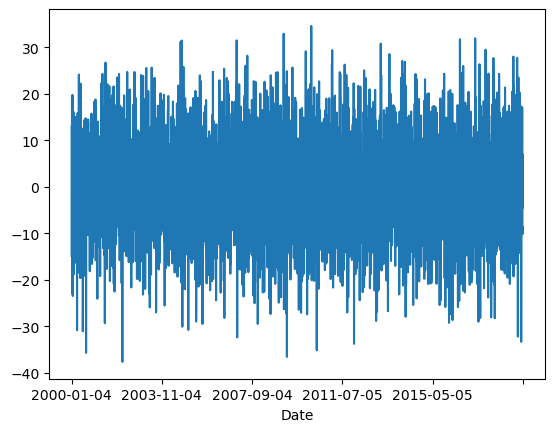

In [150]:
(y-reg.predict(X)).plot()

In [151]:
import statsmodels.api as sm
res = sm.OLS(y,sm.add_constant(X)).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Asset   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1568.
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:50:14   Log-Likelihood:                -18642.
No. Observations:                4999   AIC:                         3.730e+04
Df Residuals:                    4990   BIC:                         3.736e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0284      0.143      0.199      0.8

# Polynomial Features

In [152]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
evaluate(reg, poly.fit_transform(X), y, cv=fd_ts_cv)

Mean Absolute Error:     9.063 +/- 27.843
Root Mean Squared Error: 29.281 +/- 223.151


In [155]:
poly = PolynomialFeatures(interaction_only=True)
evaluate(reg, poly.fit_transform(X), y, cv=fd_ts_cv)

Mean Absolute Error:     8.588 +/- 8.206
Root Mean Squared Error: 11.878 +/- 25.514


In [156]:
res = sm.OLS(y,sm.add_constant(poly.fit_transform(X))).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Asset   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     349.2
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:52:52   Log-Likelihood:                -18628.
No. Observations:                4999   AIC:                         3.733e+04
Df Residuals:                    4962   BIC:                         3.757e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0753      0.187     -0.402      0.6

In [158]:
poly.get_feature_names_out()

array(['1', 'Signal1', 'Signal2', 'Signal3', 'Signal4', 'Signal5',
       'Signal6', 'Signal7', 'Signal8', 'Signal1 Signal2',
       'Signal1 Signal3', 'Signal1 Signal4', 'Signal1 Signal5',
       'Signal1 Signal6', 'Signal1 Signal7', 'Signal1 Signal8',
       'Signal2 Signal3', 'Signal2 Signal4', 'Signal2 Signal5',
       'Signal2 Signal6', 'Signal2 Signal7', 'Signal2 Signal8',
       'Signal3 Signal4', 'Signal3 Signal5', 'Signal3 Signal6',
       'Signal3 Signal7', 'Signal3 Signal8', 'Signal4 Signal5',
       'Signal4 Signal6', 'Signal4 Signal7', 'Signal4 Signal8',
       'Signal5 Signal6', 'Signal5 Signal7', 'Signal5 Signal8',
       'Signal6 Signal7', 'Signal6 Signal8', 'Signal7 Signal8'],
      dtype=object)

# Gradient Boosting

In [121]:
from sklearn.ensemble import HistGradientBoostingRegressor
gbrt = HistGradientBoostingRegressor(random_state=42)

# Lagged Signals

In [112]:
X=fd_ts.drop(columns="Asset").shift(1).drop("2000-01-04")
y=fd_ts["Asset"].drop("2000-01-04")
fd_ts_cv2 = TimeSeriesSplit(
    n_splits=fd_ts.shape[0]-2,
    test_size=1
)

In [113]:
evaluate(reg, X, y, cv=fd_ts_cv2)

Mean Absolute Error:     15.001 +/- 11.524
Root Mean Squared Error: 18.916 +/- 25.313


In [137]:
temp = fd_ts.drop(columns="Asset").shift(1).drop("2000-01-04")
temp["Asset"]=fd_ts["Asset"].drop("2000-01-04")
corr = temp.corr()
corr.style.background_gradient(cmap='coolwarm')

,Signal1,Signal2,Signal3,Signal4,Signal5,Signal6,Signal7,Signal8,Asset
Signal1,1.000000,0.394311,-0.011884,-0.008808,-0.006018,-0.009541,-0.004807,-0.025588,-0.165698
Signal2,0.394311,1.000000,-0.001041,0.002292,-0.036596,-0.025222,-0.012645,-0.040529,0.001855
Signal3,-0.011884,-0.001041,1.000000,0.504763,0.007367,0.004617,-0.004945,0.012330,0.025509
Signal4,-0.008808,0.002292,0.504763,1.000000,-0.020555,0.003324,-0.006332,-0.015933,0.011579
Signal5,-0.006018,-0.036596,0.007367,-0.020555,1.000000,-0.199530,0.017163,0.516854,0.023233
Signal6,-0.009541,-0.025222,0.004617,0.003324,-0.199530,1.000000,0.396195,-0.016854,-0.015068
Signal7,-0.004807,-0.012645,-0.004945,-0.006332,0.017163,0.396195,1.000000,0.011752,-0.004275
Signal8,-0.025588,-0.040529,0.012330,-0.015933,0.516854,-0.016854,0.011752,1.000000,0.018818
Asset,-0.165698,0.001855,0.025509,0.011579,0.023233,-0.015068,-0.004275,0.018818,1.000000


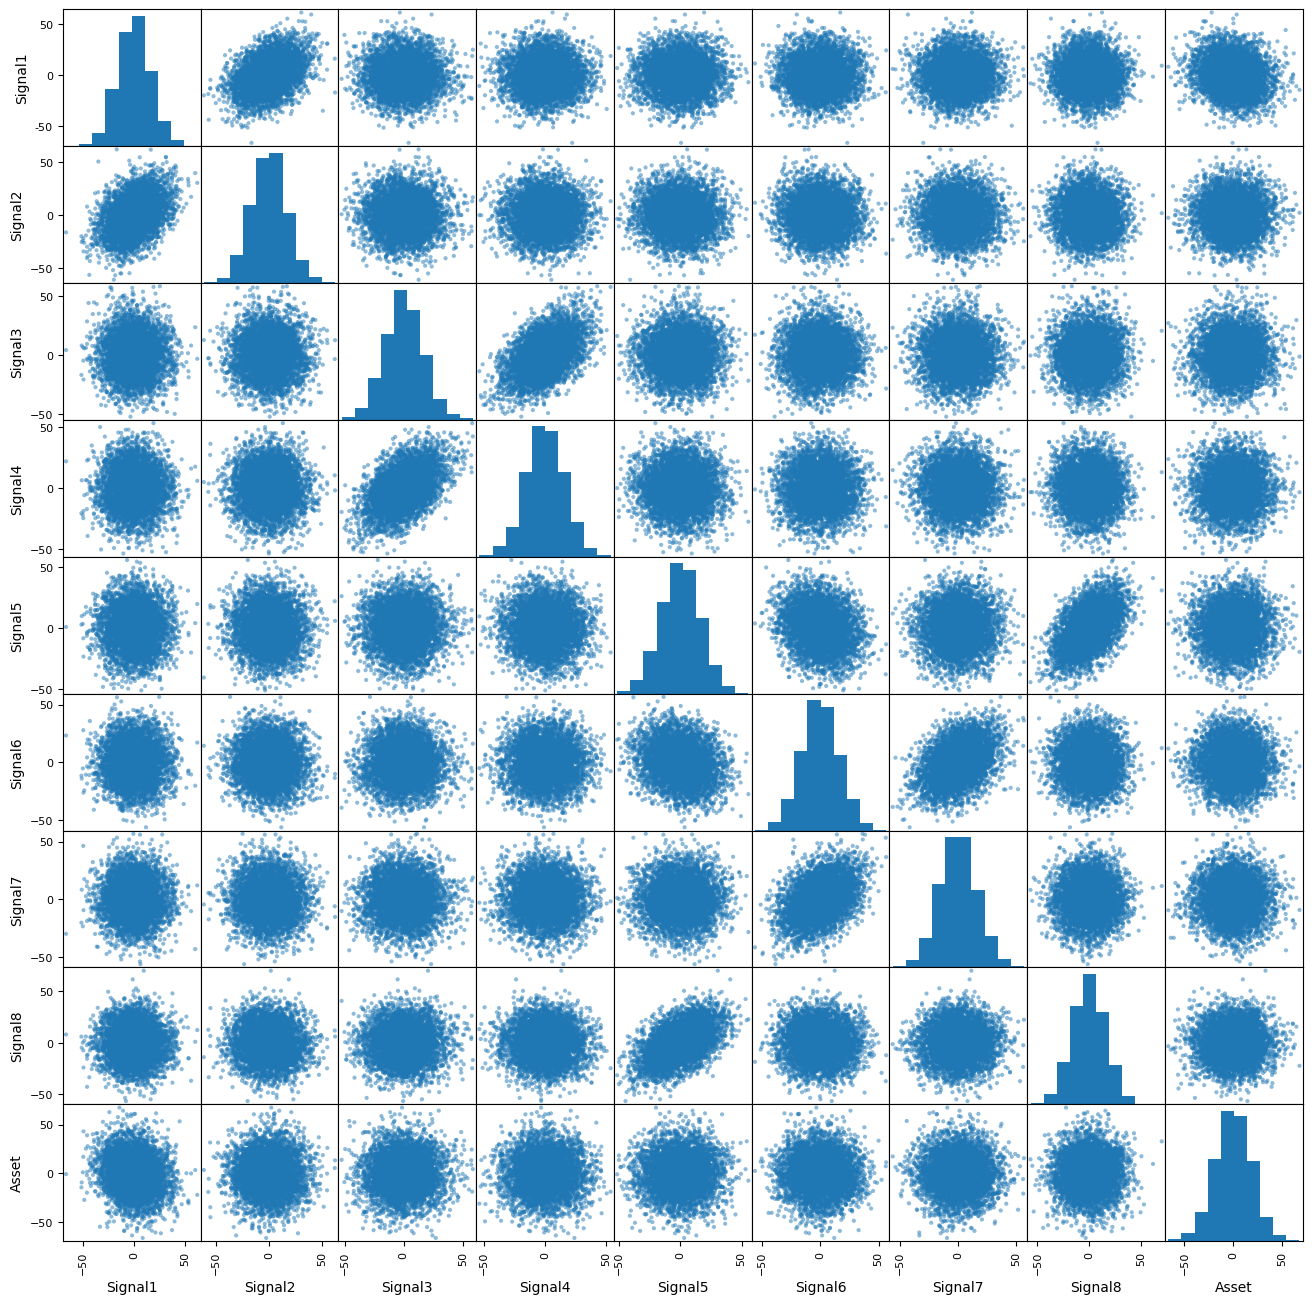

In [138]:
pd.plotting.scatter_matrix(temp,figsize=(16,16))
plt.show()